<a href="https://colab.research.google.com/github/RaghavendhraRao/stock_market_prediction_ISE_DSFP/blob/main/ds_final_proj_stock_market_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# different numerical results due to floating-point round-off errors from different computation orders.
# To turn them off, set
TF_ENABLE_ONEDNN_OPTS=0

# # fetch dataset
# istanbul_stock_exchange = fetch_ucirepo(id=247)
ise_data = fetch_ucirepo(id=247)


In [4]:
# check the type of dataset
print("dataset type: ", type(ise_data), "\n")

# print the keys in dataset
print("keys: ", ise_data.keys(), "\n")

# fetch the stock data from the dataset
data_info = ise_data.data['features']
print("data type: ", type(data_info), "\n")

print("print first 5 rows..!")
print(data_info.head(), "\n")

#taking the reference variable
stock_data = data_info

dataset type:  <class 'ucimlrepo.dotdict.dotdict'> 

keys:  dict_keys(['data', 'metadata', 'variables']) 

data type:  <class 'pandas.core.frame.DataFrame'> 

print first 5 rows..!
       date       ISE       ISE        SP       DAX      FTSE    NIKKEI  \
0  5-Jan-09  0.035754  0.035754 -0.004679  0.002193  0.003894  0.000000   
1  6-Jan-09  0.025426  0.025426  0.007787  0.008455  0.012866  0.004162   
2  7-Jan-09 -0.028862 -0.028862 -0.030469 -0.017833 -0.028735  0.017293   
3  8-Jan-09 -0.062208 -0.062208  0.003391 -0.011726 -0.000466 -0.040061   
4  9-Jan-09  0.009860  0.009860 -0.021533 -0.019873 -0.012710 -0.004474   

    BOVESPA        EU        EM  
0  0.031190  0.012698  0.028524  
1  0.018920  0.011341  0.008773  
2 -0.035899 -0.017073 -0.020015  
3  0.028283 -0.005561 -0.019424  
4 -0.009764 -0.010989 -0.007802   



In [5]:
# printing the summary statistics
# Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values
print(stock_data.describe(),"\n \n")


# information about the dataset
print(stock_data.info(),"\n \n")

# print("\n","Data Columns: ", data_info.columns)

# print("varibles data :")
print(ise_data.variables,"\n \n")


# convert the date datatpe to datetime
print(stock_data['date'].head(),"\n \n")

stock_data['date'] = pd.to_datetime(stock_data['date'], format='%d-%b-%y')
print(stock_data['date'].head(),"\n", "\n")
# print(stock_data.dtypes, "/n")

              ISE         ISE          SP         DAX        FTSE      NIKKEI  \
count  536.000000  536.000000  536.000000  536.000000  536.000000  536.000000   
mean     0.001629    0.001629    0.000643    0.000721    0.000510    0.000308   
std      0.016264    0.016264    0.014093    0.014557    0.012656    0.014850   
min     -0.062208   -0.062208   -0.054262   -0.052331   -0.054816   -0.050448   
25%     -0.006669   -0.006669   -0.004675   -0.006212   -0.005808   -0.007407   
50%      0.002189    0.002189    0.000876    0.000887    0.000409    0.000000   
75%      0.010584    0.010584    0.006706    0.008224    0.007428    0.007882   
max      0.068952    0.068952    0.068366    0.058951    0.050323    0.061229   

          BOVESPA          EU          EM  
count  536.000000  536.000000  536.000000  
mean     0.000935    0.000471    0.000936  
std      0.015751    0.012990    0.010501  
min     -0.053849   -0.048817   -0.038564  
25%     -0.007215   -0.005952   -0.004911  
50%   

In [6]:
# set the date column as Index
stock_data.set_index('date', inplace=True)

# #print few rows
# print("First few rows from the stock dataset...!")
# print(stock_data.head(),"\n \n")

# check for null values in the dataset
print("Check null values...!")
data_null_values = stock_data.isnull().sum()
print("null values found in dataset: ", data_null_values,"\n \n")

# calculating the mean of each month and restructure the data
print("Calculating the mean for each month...!")
stock_mean_data = stock_data.resample('M').mean()
print(stock_mean_data.head(),"\n \n")



# removing the duplicates in the columns
print("Removinig the duplicate columns...!")
stock_mean_data = stock_mean_data.loc[:, ~stock_mean_data.columns.duplicated()]
print(stock_mean_data.head(),"\n \n")

Check null values...!
null values found in dataset:  ISE        0
ISE        0
SP         0
DAX        0
FTSE       0
NIKKEI     0
BOVESPA    0
EU         0
EM         0
dtype: int64 
 

Calculating the mean for each month...!
                 ISE       ISE        SP       DAX      FTSE    NIKKEI  \
date                                                                     
2009-01-31 -0.002024 -0.002024 -0.006033 -0.006827 -0.004735 -0.006165   
2009-02-28 -0.003820 -0.003820 -0.005823 -0.006052 -0.004006 -0.002736   
2009-03-31  0.003175  0.003175  0.003725  0.002764  0.001125  0.003139   
2009-04-30  0.009799  0.009799  0.004275  0.007379  0.003704  0.004044   
2009-05-31  0.005297  0.005297  0.002722  0.001858  0.002117  0.003984   

             BOVESPA        EU        EM  
date                                      
2009-01-31 -0.001186 -0.004690 -0.003085  
2009-02-28 -0.001443 -0.004956 -0.001480  
2009-03-31  0.003153  0.001523  0.004435  
2009-04-30  0.006883  0.005386  0.00532

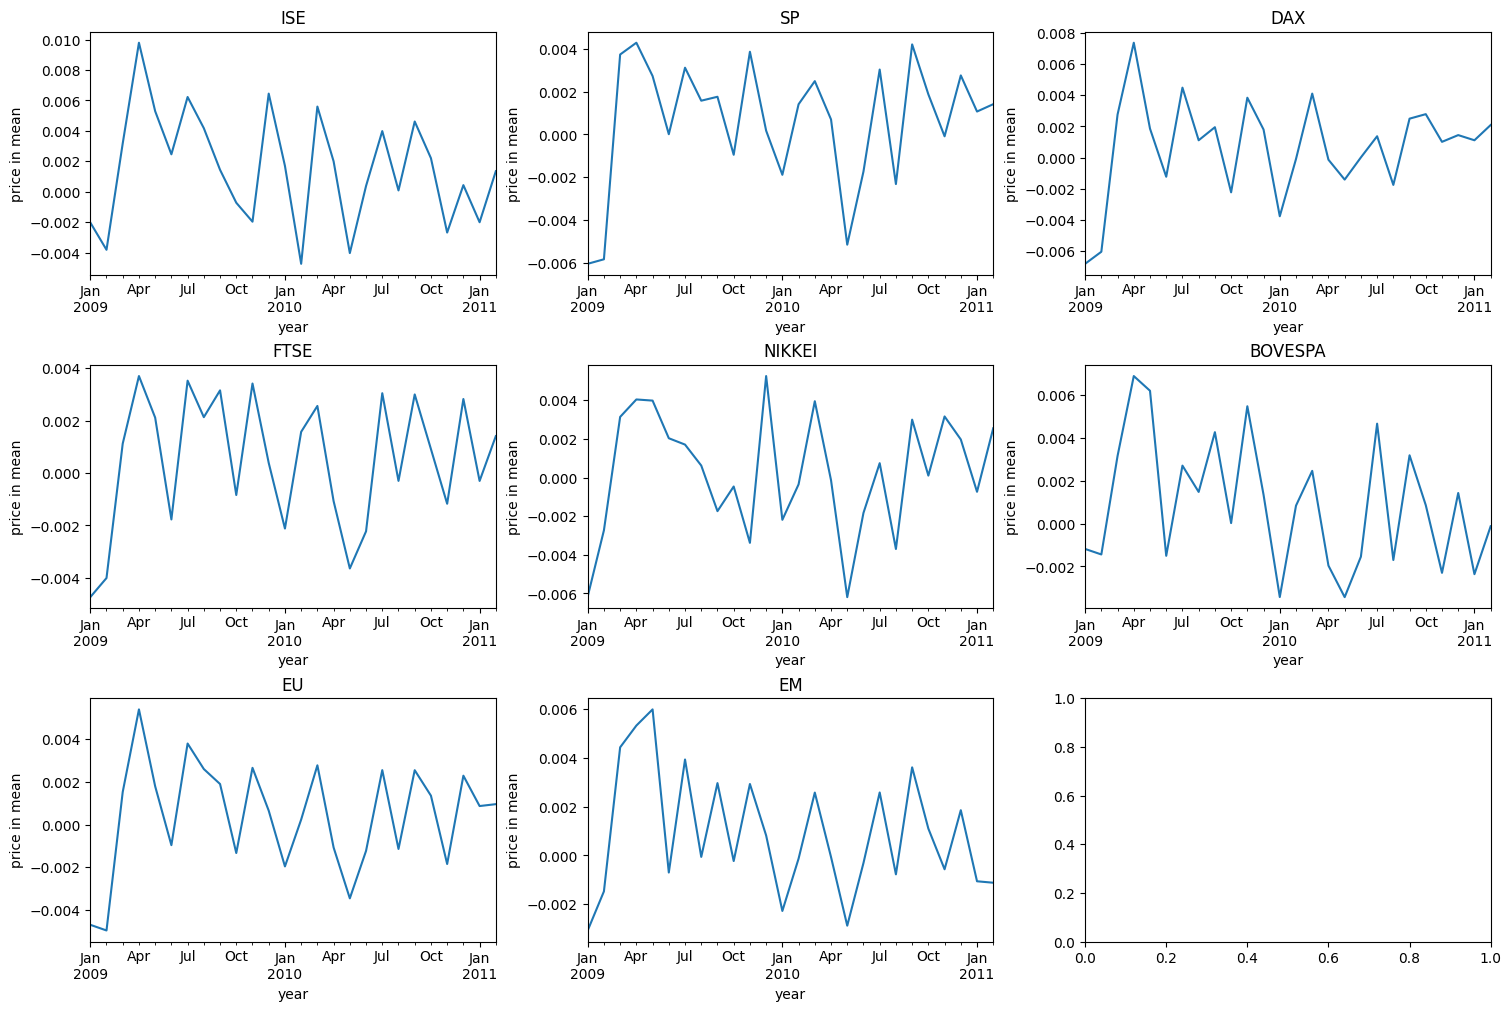

In [7]:
# Plot each column in the data
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), constrained_layout=True)
data_columns = stock_mean_data.columns
for col, ax in enumerate(axes.flat):
    if col < len(data_columns):
        stock_mean_data[data_columns[col]].plot(ax=ax)
        ax.set_title(data_columns[col])
        ax.set_xlabel('year')
        ax.set_ylabel('price in mean')

plt.show()

In [8]:
# removing the duplicates in the columns from the dataset
print("Removinig the duplicate columns...!")
stock_data = stock_data.loc[:, ~stock_data.columns.duplicated()]
print(stock_data.head(),"\n \n")

Removinig the duplicate columns...!
                 ISE        SP       DAX      FTSE    NIKKEI   BOVESPA  \
date                                                                     
2009-01-05  0.035754 -0.004679  0.002193  0.003894  0.000000  0.031190   
2009-01-06  0.025426  0.007787  0.008455  0.012866  0.004162  0.018920   
2009-01-07 -0.028862 -0.030469 -0.017833 -0.028735  0.017293 -0.035899   
2009-01-08 -0.062208  0.003391 -0.011726 -0.000466 -0.040061  0.028283   
2009-01-09  0.009860 -0.021533 -0.019873 -0.012710 -0.004474 -0.009764   

                  EU        EM  
date                            
2009-01-05  0.012698  0.028524  
2009-01-06  0.011341  0.008773  
2009-01-07 -0.017073 -0.020015  
2009-01-08 -0.005561 -0.019424  
2009-01-09 -0.010989 -0.007802   
 



In [9]:
# Identify the key features and targeted feature

X_stock_key_features = ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'] # These features are used to train the model
Y_stock_target = ['ISE'] # to predict the price using the model


In [10]:
def train_test_split_data(stock_data, X_stock_features, Y_stock_target):
  x_train, x_test, y_train, y_test = train_test_split(stock_data[X_stock_key_features], + stock_data[Y_stock_target],
                                                      test_size=0.2, random_state=42)

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split_data(stock_data, X_stock_key_features, Y_stock_target)

print(len(x_train))

print(y_train.shape)
print(y_test.shape)

428
(428, 1)
(108, 1)


# **Normalization**

In [21]:
def normalize_data(x_train, x_test, y_train, y_test):

  # # normalize the data
  # # converting the stock prices to binary values into 0,1

  scaler_data =MinMaxScaler()

  norm_x_train = scaler_data.fit_transform(x_train) # features variable
  norm_x_test = scaler_data.transform(x_test)
  norm_y_train = scaler_data.fit_transform(y_train) # targeted variable
  norm_y_test = scaler_data.transform(y_test)

  return norm_x_train, norm_x_test, norm_y_train, norm_y_test

norm_x_train, norm_x_test, norm_y_train, norm_y_test = normalize_data(x_train, x_test, y_train, y_test)

print(norm_x_train.shape)
print(norm_y_train.shape)
print(norm_x_test.shape)
print(norm_y_test.shape)

(428, 7)
(428, 1)
(108, 7)
(108, 1)


In [22]:
# Reshape the normalized data by adding a timestep dimension
norm_x_train = norm_x_train.reshape((norm_x_train.shape[0], 1, norm_x_train.shape[1]))
norm_x_test = norm_x_test.reshape((norm_x_test.shape[0], 1, norm_x_test.shape[1]))

In [23]:
print(norm_x_train.shape)
print(norm_y_train.shape)
print(norm_x_test.shape)
print(norm_y_test.shape)

(428, 1, 7)
(428, 1)
(108, 1, 7)
(108, 1)


# **Implementing LSTM MODEL**

In [24]:
def lstm_model(norm_x_train):
  # Build the LSTM model from scratch
  model = Sequential()
  model.add(LSTM(units=128, return_sequences=True, input_shape=(norm_x_train.shape[1], norm_x_train.shape[2]))) #layer 1 with 50 units
  model.add(Dropout(0.3)) # prevent overfitting given 10% loss for every epoch
  model.add(LSTM(units=64, return_sequences=True)) # layer 2 with 64 units will only return the last output seq
  model.add(Dropout(0.3))
  model.add(LSTM(units=32))
  model.add(Dense(1)) # predicting only single values index(ISE) (predict single continuous value)


  model.compile(loss='mean_squared_error', #calculate the error (pred & act)
                optimizer=Adam(learning_rate=0.0003), #minimize the loss function.
                metrics=['mean_absolute_error']) # compiling the model


  return model

lstm_model = lstm_model(norm_x_train)

lstm_model.summary() # model summary


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131,489 (513.63 KB)

 Trainable params: 131,489 (513.63 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# train the model
history = lstm_model.fit(norm_x_train, norm_y_train, epochs=100, batch_size=16,
                         validation_split=0.2, verbose=1)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.2289 - mean_absolute_error: 0.4631 - val_loss: 0.2344 - val_mean_absolute_error: 0.4671
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2016 - mean_absolute_error: 0.4328 - val_loss: 0.1835 - val_mean_absolute_error: 0.4104
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1467 - mean_absolute_error: 0.3671 - val_loss: 0.0917 - val_mean_absolute_error: 0.2826
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0563 - mean_absolute_error: 0.2123 - val_loss: 0.0084 - val_mean_absolute_error: 0.0750
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0851 - val_loss: 0.0076 - val_mean_absolute_error: 0.0698
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0115 - mean_absolute_error: 0.0835 - val_loss: 0.0086 - val_mean_absolute_error: 0.0758
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0104 - mean_absolute_error: 0.0805 - val_los

In [30]:
# predict the test data with lstm model
y_pred = lstm_model.predict(norm_x_test)
y_pred.shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


(108, 1)

In [33]:
# just for checking
# predicting the training data
y_pred_train = lstm_model.predict(norm_x_train)
y_pred_train.shape

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


(428, 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0769 


training loss:  0.01088964194059372
Mean absolute error: 0.07887078821659088


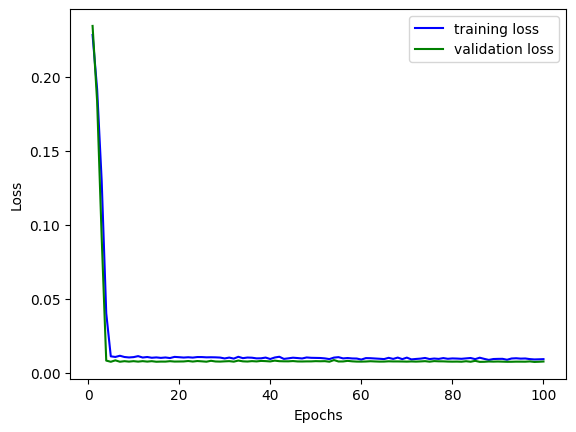

In [36]:
#Access the training data  to check the loss and MAE
training_hist = history.history

# evaluate model
train_loss, train_mean_absolute_error = lstm_model.evaluate(norm_x_test, norm_y_test)
print("\n")
print("training loss: ", train_loss)
print(f'Mean absolute error: {train_mean_absolute_error}')


# visualize the training loss and validation loss from training hstory
training_loss = training_hist['loss']
training_val_loss = training_hist['val_loss']
training_epochs = range(1, len(training_loss)+1)
plt.plot(training_epochs, training_loss, 'b', label='training loss')
plt.plot(training_epochs, training_val_loss, 'g', label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# visualize the training data, actual data and predicted data



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Assuming forecast and norm_y_test are numpy arrays or pandas series
# If not, convert them to numpy arrays
y_pred = np.array(y_pred)
norm_y_test = np.array(norm_y_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(norm_y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(norm_y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(norm_y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


Mean Absolute Error (MAE): 0.001519500360218178
Mean Squared Error (MSE): 3.0759997192384773e-06
Root Mean Squared Error (RMSE): 0.0017538528214301441
Mean Absolute Percentage Error (MAPE): 0.004410456848812946


**with feature extraction**

In [ ]:
import seaborn as sns


In [ ]:
stock_data.head()

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,
2009-01-05,0.035754,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [ ]:
corr_matrix = stock_data.corr()
corr_matrix

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
ISE,1.000000,0.439489,0.602081,0.622948,0.260052,0.432898,0.655519,0.600295
SP,0.439489,1.000000,0.685843,0.657673,0.131250,0.722069,0.687550,0.528243
DAX,0.602081,0.685843,1.000000,0.867369,0.258538,0.585791,0.936393,0.665162
FTSE,0.622948,0.657673,0.867369,1.000000,0.255236,0.596287,0.948963,0.687543
NIKKEI,0.260052,0.131250,0.258538,0.255236,1.000000,0.172752,0.283750,0.547288
BOVESPA,0.432898,0.722069,0.585791,0.596287,0.172752,1.000000,0.621704,0.688074
EU,0.655519,0.687550,0.936393,0.948963,0.283750,0.621704,1.000000,0.716502
EM,0.600295,0.528243,0.665162,0.687543,0.547288,0.688074,0.716502,1.000000


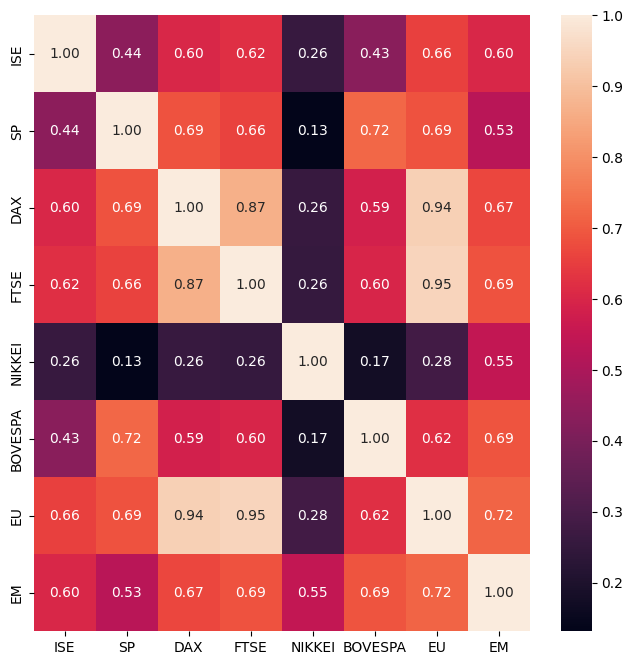

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot =  True, fmt = ".2f")
plt.show()

In [ ]:
stock_feature_extracted = stock_data.drop(columns = ['FTSE','EU','EM'])
stock_feature_extracted.head()

,ISE,SP,DAX,NIKKEI,BOVESPA
date,,,,,
2009-01-05,0.035754,-0.004679,0.002193,0.000000,0.031190
2009-01-06,0.025426,0.007787,0.008455,0.004162,0.018920
2009-01-07,-0.028862,-0.030469,-0.017833,0.017293,-0.035899
2009-01-08,-0.062208,0.003391,-0.011726,-0.040061,0.028283
2009-01-09,0.009860,-0.021533,-0.019873,-0.004474,-0.009764


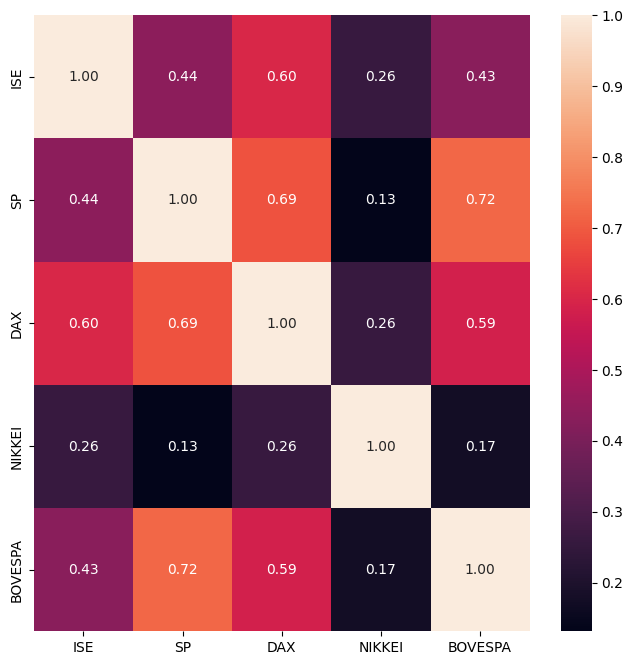

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(stock_feature_extracted.corr(), annot =  True, fmt = ".2f")
plt.show()

In [ ]:
x = ['SP', 'DAX', 'NIKKEI', 'BOVESPA']
y = ['ISE']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(stock_data[x], + stock_data[y],
                                                    test_size=0.7, random_state=42)

In [ ]:
# # normalize the data
# # converting the stock prices to binary values into 0,1

scaler_data =MinMaxScaler(feature_range=(0,1))

norm_x_train = scaler_data.fit_transform(x_train) # features variable
norm_x_test = scaler_data.transform(x_test)
norm_y_train = scaler_data.fit_transform(y_train) # targeted variable
norm_y_test = scaler_data.transform(y_test)

print(norm_x_train.shape)
print(norm_y_train.shape)
print(norm_x_test.shape)
print(norm_y_test.shape)

(160, 4)
(160, 1)
(376, 4)
(376, 1)


In [ ]:
# # Reshaping the normalized data into array

norm_x_train_f = norm_x_train.reshape(-1,1)
norm_x_test_f = norm_x_test.reshape(-1,1)
norm_y_train_f = norm_y_train.reshape(-1,1)
norm_y_test_f = norm_y_test.reshape(-1,1)

print(norm_x_train_f.shape)  # Should output (428*7, 1)
print(norm_x_test_f.shape)   # Should output (428*7, 1)

print("x_train, x_test",norm_x_train_f.shape, norm_x_test_f.shape) # reshape output into (428*7, 1)
print("y_train, y_test",norm_y_train_f.shape, norm_y_test_f.shape)

(640, 1)
(1504, 1)
x_train, x_test (640, 1) (1504, 1)
y_train, y_test (160, 1) (376, 1)


In [ ]:
x_train.head()

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

## Implementing ARIMA model